In [2]:
import numpy as np

In [3]:
'''例如，数据集一共有5个样本，真实类别为（1，0，0，1，0）；
二分类机器学习模型，得到的预测结果为（0.5，0.6，0.4，0.7，0.3）。'''

y_true = np.array([1,0,0,1,0])

# 概率论，KNN概率，LR概率
y_predict = np.array([0.5,0.6,0.4,0.7,0.3])

In [8]:
# 阈值 > 0.3 类别 1，小等于 类别 0 

cond = y_predict > 0.3
print(cond)
score = (y_true == cond).sum()/5
score

[ True  True  True  True False]


0.6

In [9]:
# 阈值 > 0.4 类别 1，小等于 类别 0 
# 准确率，是不是随着我们阈值，发生变化
cond = y_predict > 0.4
print(cond)
score = (y_true == cond).sum()/5
score

[ True  True False  True False]


0.8

In [10]:
# 阈值 > 0.5 类别 1，小等于 类别 0 
# 准确率，是不是随着我们阈值，发生变化
cond = y_predict > 0.5
print(cond)
score = (y_true == cond).sum()/5
score

[False  True False  True False]


0.6

In [11]:
# 阈值 > 0.7 类别 1，小等于 类别 0 
# 准确率，是不是随着我们阈值，发生变化
cond = y_predict > 0.7
print(cond)
score = (y_true == cond).sum()/5
score

[False False False False False]


0.6

In [12]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

import sklearn.datasets as datasets

In [13]:
iris = datasets.load_iris()
X = iris['data']

y = iris['target']

In [16]:
cond = y!=2

X = X[cond]
y = y[cond]

In [17]:
# 二分类问题
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
# 可以将数据分开，分成训练数据和测试数据
# train_test_split类似 只分一次
# 分成6份（每一份都有训练数据和测试数据）
from sklearn.model_selection import KFold,StratifiedKFold

In [19]:
A = np.random.randn(8,2) 
# 目标值中，0:1 = 4:4 = 1:1
b = np.array([0,1,0,0,1,1,1,0])

In [23]:
kFold = KFold(4)

# train，test是索引
for train,test in kFold.split(A,b):
    print(train,test)

[2 3 4 5 6 7] [0 1]
[0 1 4 5 6 7] [2 3]
[0 1 2 3 6 7] [4 5]
[0 1 2 3 4 5] [6 7]


In [24]:
# 样本分成多少份（每一份都可以进行训练和预测）
# 分类的时候，考虑样本均衡
sKFold = StratifiedKFold(4)
for train,test in sKFold.split(A,b):
    print(train,test)

[2 3 4 5 6 7] [0 1]
[0 1 3 5 6 7] [2 4]
[0 1 2 4 6 7] [3 5]
[0 1 2 3 4 5] [6 7]


In [ ]:
# 绘制ROC曲线
''' True Positive Rate=TP/(TP+FN)，代表将真实正样本划分为正样本的概率 '''
# tpr 

'''False Positive Rate=FP/(FP+TN)，代表将真实负样本划分为正样本的概率 '''
# fpr 

In [25]:
from sklearn.metrics import roc_curve,auc

In [31]:
X.shape

(100, 4)

In [32]:
X = np.concatenate([X,np.random.randn(100,800)],axis = 1)
X.shape

(100, 804)

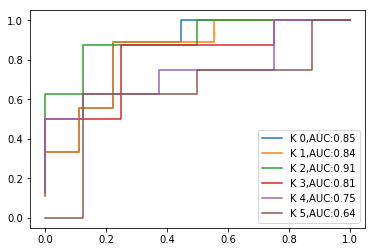

In [33]:
# iris数据太简单，算法，预测结果，非常好，100%
sKFold = StratifiedKFold(6)

logistic = LogisticRegression()

# train，test是索引
i = 0
for train,test in sKFold.split(X,y):
    
    X_train = X[train]
    X_test = X[test]
    
    y_train = y[train]
    y_test = y[test]
    
    logistic.fit(X_train,y_train)
    
#     预测
    proba_ = logistic.predict_proba(X_test)
#     print(proba_)
#   fpr作为横坐标，tpr作为纵坐标
#     求解平均的auc_mean
#    auc(fpr_mean,tpr_mean)
#   线性插值，scipy import interp
    fpr,tpr,threshold = roc_curve(y_test,proba_[:,1])
    
#     计算auc
    auc_ = auc(fpr,tpr)
    
    plt.plot(fpr,tpr,label = 'K %d,AUC:%0.2f'%(i,auc_))
    i+=1
    
    plt.legend()

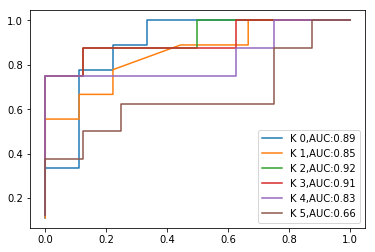

In [35]:
# iris数据太简单，算法，预测结果，非常好，100%
sKFold = StratifiedKFold(6)

svc = SVC(probability=True)

# train，test是索引
i = 0
for train,test in sKFold.split(X,y):
    
    X_train = X[train]
    X_test = X[test]
    
    y_train = y[train]
    y_test = y[test]
    
    svc.fit(X_train,y_train)
    
#     预测
    proba_ = svc.predict_proba(X_test)
#     print(proba_)
#   fpr作为横坐标，tpr作为纵坐标
    fpr,tpr,threshold = roc_curve(y_test,proba_[:,1])
    
#     计算auc
    auc_ = auc(fpr,tpr)
    
    plt.plot(fpr,tpr,label = 'K %d,AUC:%0.2f'%(i,auc_))
    i+=1
    
    plt.legend()